# Random Forest with GridSearchCV
The following dataset has information around red wine characteristics (acidity, pH, etc) as well as a quality rating. More information about the schema can be found here.

Given this, create a Random Forest model to predict wine quality. Additionally, use GridSearchCV (or a tool of your own choice) to find the best parameters for the model.

Solution will be written in Python for premium users.

In [44]:
# import libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import boxcox

In [7]:
# load dataset
df = pd.read_csv('https://raw.githubusercontent.com/erood/interviewqs.com_code_snippets/master/Datasets/winequality-red.csv',
sep=';')

In [9]:
# check if data was imported correctly
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
# look at rows/columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


* no null values
## Data Exploration

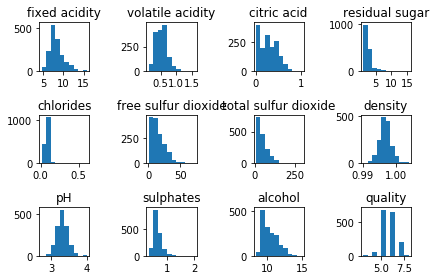

In [19]:
# counter to keep track of subplot
i = 1
# create subplots of each feature to see their distributions
for feature in df.columns:
    plt.subplot(3,4,i)
    plt.hist(df[feature])
    plt.title(feature)
    i += 1
plt.tight_layout()

* some features seem normally distributed while others do not
* Let's explore free sulfur dioxide, total sulfur dioxide, residual sugar, citric acid, alcohol, and chlorides

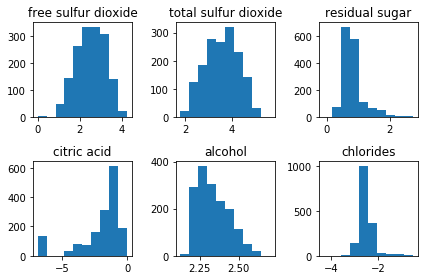

In [35]:
non_norm = ['free sulfur dioxide','total sulfur dioxide','residual sugar','citric acid','alcohol','chlorides']
i = 1
for feature in non_norm:
    plt.subplot(2,3,i)
    # log values to see if it helps to make it more normal
    plt.hist(np.log(df[feature]+0.001))
    plt.title(feature)
    i += 1
plt.tight_layout()

(array([403., 203., 286., 235., 262., 123.,  69.,  17.,   0.,   1.]),
 array([-0.999, -0.899, -0.799, -0.699, -0.599, -0.499, -0.399, -0.299,
        -0.199, -0.099,  0.001]),
 <a list of 10 Patch objects>)

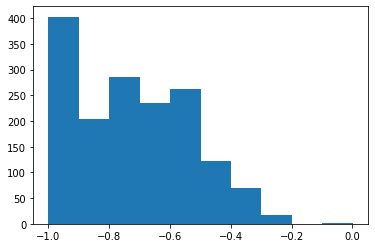

In [63]:
plt.hist(boxcox(np.absolute(df['citric acid'])+0.001, 1))

(array([403., 203., 316., 205., 262., 132.,  62.,  15.,   0.,   1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

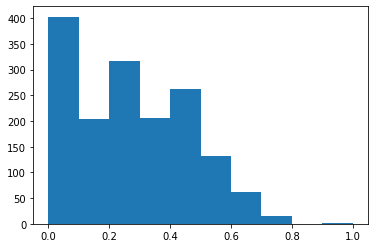

In [64]:
plt.hist(df['citric acid'])